# LSST Camera Footprint Filter Demo

This notebook contains an LSST camera foot print filter for LSST opsim based survey simulations (http://astro-lsst-01.astro.washington.edu:8080/) and the output of the JPL based solar system object survey simulator (https://github.com/dirac-institute/survey_simulator). 

Requries the LSST stack.


In [1]:
import PPFootprintFilter as fp

In [2]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import os

In [5]:
def getSqlData(database,rows_start,nrows):
    """Import dataset from local SQL database
    
    Parameters:
    -----------
    database   ... path to database
    rows_start ... number of row to start
    rows_max   ... number of rows to select
    
    Returns:
    --------
    observations ... pandas dataframe containing observations from JPL database
    """
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT * FROM SummaryAllProps LIMIT """+str(rows_start)+','+str(nrows), con)
    return observations

In [6]:
def randobs(ronsky=3,ra=180,dec=45, n=100000):

    """Create random observations centered on RA, Dec with radius r.
    Random observations are generated correctly only for declinations < dec+r.
    
    Parameters:
    ------------
    ronksy ... on sky radius [deg]
    ra     ... Right Ascension of center [deg]
    dec    ... Declination of center
    
    Returns:
    --------
    raout ... Right Ascension of fake observations
    decout ... Declination of fake observations
    
    """
    # radius of the circle
    # center of the circle (x, y)
    # random angle
    
    rnd1=np.random.rand(n)
    rnd2=np.random.rand(n)
    
    alpha = 2 * np.pi * rnd1
    # random radius
    r = ronsky * np.sqrt(rnd2)
    # calculating coordinates
    raout = r * np.cos(alpha) + ra
    decout = r * np.sin(alpha) + dec
    
    return np.mod(raout+360,360),decout

## Import LSST Opsim database 
This database contains LSST pointings and environmental information such as seeing.


In [8]:
db_path="../data/baseline_10yrs_10klines.db"

Select the first ten exposures of the LSST survey for testing purposes.

In [9]:
LSSTdf=getSqlData(db_path,0,1000)

In [10]:
LSSTdf

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
0,0,294.696105,4.470982,59853.985644,0.000000,30.0,z,192.049712,1,1.216566,...,347.652307,269.499503,258.357947,3.277205,-0.058536,263.929522,-26.677289,43.075471,107.116488,42.296595
1,1,297.734708,3.424593,59853.986058,0.000000,30.0,z,195.581238,1,1.202931,...,348.604610,269.446110,258.277406,3.277211,-0.058539,263.933931,-26.677421,44.408146,110.104670,42.298558
2,2,300.801528,2.671025,59853.986472,0.000000,30.0,z,200.230465,1,1.197113,...,348.603508,269.392576,258.196659,3.277218,-0.058542,263.938347,-26.677551,46.115926,113.132414,42.300525
3,3,298.330258,0.734934,59853.986884,0.000000,30.0,z,196.412816,1,1.167983,...,348.591598,269.339257,258.116241,3.277225,-0.058544,263.942741,-26.677677,42.982020,110.566469,42.302483
4,4,295.864474,-1.054837,59853.987297,0.000000,30.0,z,192.090412,1,1.145485,...,348.572859,269.285778,258.035586,3.277231,-0.058547,263.947145,-26.677802,39.951466,107.992826,42.304444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,321.958891,-8.932119,59855.026483,59855.056627,30.0,y,221.498166,1,1.092940,...,343.387431,268.328470,249.343974,3.293664,-0.065570,280.431216,-27.293440,43.246079,131.697209,49.889951
996,996,318.964894,-8.305731,59855.026900,59855.056627,30.0,y,215.481585,1,1.088303,...,342.695919,268.289509,249.247189,3.293670,-0.065573,280.435734,-27.292788,41.048930,128.941530,49.891974
997,997,315.998062,-7.668236,59855.027318,59855.056627,30.0,y,209.155359,1,1.086940,...,342.088726,268.250309,249.150090,3.293677,-0.065576,280.440258,-27.292133,38.950760,126.179622,49.894000
998,998,314.168781,-9.938367,59855.027731,59855.056627,30.0,y,206.653820,1,1.067683,...,341.006329,268.211320,249.053784,3.293683,-0.065579,280.444737,-27.291483,36.178497,123.973923,49.896006


## Create fake observation data

In [11]:
nobs_per_field=10000

In [12]:
rao,deco=randobs(ronsky=2.5,ra=LSSTdf['fieldRA'][0],dec=LSSTdf['fieldDec'][0],n=nobs_per_field)
dfobs0=pd.DataFrame(np.array([rao,deco]).T,columns=['AstRA(deg)','AstDec(deg)'])
dfobs0['FieldMJD']=LSSTdf['observationStartMJD'][0]

In [13]:
rao,deco=randobs(ronsky=2.5,ra=LSSTdf['fieldRA'][2],dec=LSSTdf['fieldDec'][2],n=nobs_per_field)
dfobs1=pd.DataFrame(np.array([rao,deco]).T,columns=['AstRA(deg)','AstDec(deg)'])
dfobs1['FieldMJD']=LSSTdf['observationStartMJD'][2]

In [14]:
dfobs=pd.concat([dfobs0,dfobs1])
dfobs.reset_index(inplace=True,drop=True)

In [15]:
dfobs

,AstRA(deg),AstDec(deg),FieldMJD
0,295.109822,3.311395,59853.985644
1,295.441450,4.144370,59853.985644
2,294.456068,6.566479,59853.985644
3,295.671664,2.977104,59853.985644
4,295.711593,5.341446,59853.985644
...,...,...,...
19995,300.865340,1.225254,59853.986472
19996,300.362520,1.332564,59853.986472
19997,298.787820,2.953443,59853.986472
19998,302.020924,4.006561,59853.986472


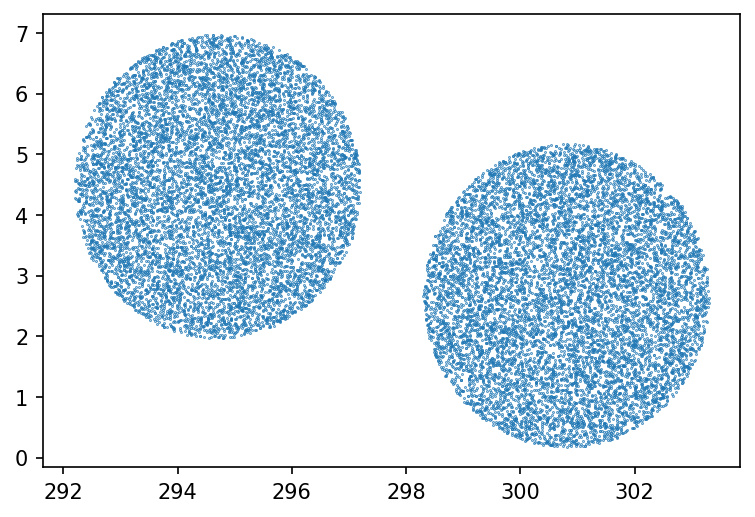

In [16]:
plt.figure(dpi=150,figsize=(6,4))
plt.scatter(dfobs['AstRA(deg)'],dfobs['AstDec(deg)'],s=0.1)
plt.show()

## Select pointings from LSST opsim 

In [17]:
dfpointings=LSSTdf[0:5]

In [18]:
dfpointings

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
0,0,294.696105,4.470982,59853.985644,0.0,30.0,z,192.049712,1,1.216566,...,347.652307,269.499503,258.357947,3.277205,-0.058536,263.929522,-26.677289,43.075471,107.116488,42.296595
1,1,297.734708,3.424593,59853.986058,0.0,30.0,z,195.581238,1,1.202931,...,348.604610,269.446110,258.277406,3.277211,-0.058539,263.933931,-26.677421,44.408146,110.104670,42.298558
2,2,300.801528,2.671025,59853.986472,0.0,30.0,z,200.230465,1,1.197113,...,348.603508,269.392576,258.196659,3.277218,-0.058542,263.938347,-26.677551,46.115926,113.132414,42.300525
3,3,298.330258,0.734934,59853.986884,0.0,30.0,z,196.412816,1,1.167983,...,348.591598,269.339257,258.116241,3.277225,-0.058544,263.942741,-26.677677,42.982020,110.566469,42.302483
4,4,295.864474,-1.054837,59853.987297,0.0,30.0,z,192.090412,1,1.145485,...,348.572859,269.285778,258.035586,3.277231,-0.058547,263.947145,-26.677802,39.951466,107.992826,42.304444


## Test Filtering on fake observations.

In [20]:
%%time
df_new=fp.cameraFootprintFilter(dfobs,LSSTdf)

CPU times: user 1.83 s, sys: 72 ms, total: 1.9 s
Wall time: 492 ms


In [21]:
df_new

,AstRA(deg),AstDec(deg),FieldMJD
0,295.109822,3.311395,59853.985644
1,295.441450,4.144370,59853.985644
2,295.671664,2.977104,59853.985644
3,295.711593,5.341446,59853.985644
4,293.870461,4.286884,59853.985644
...,...,...,...
9607,301.800153,3.500881,59853.986472
9608,299.780549,2.706748,59853.986472
9609,300.865340,1.225254,59853.986472
9610,300.362520,1.332564,59853.986472


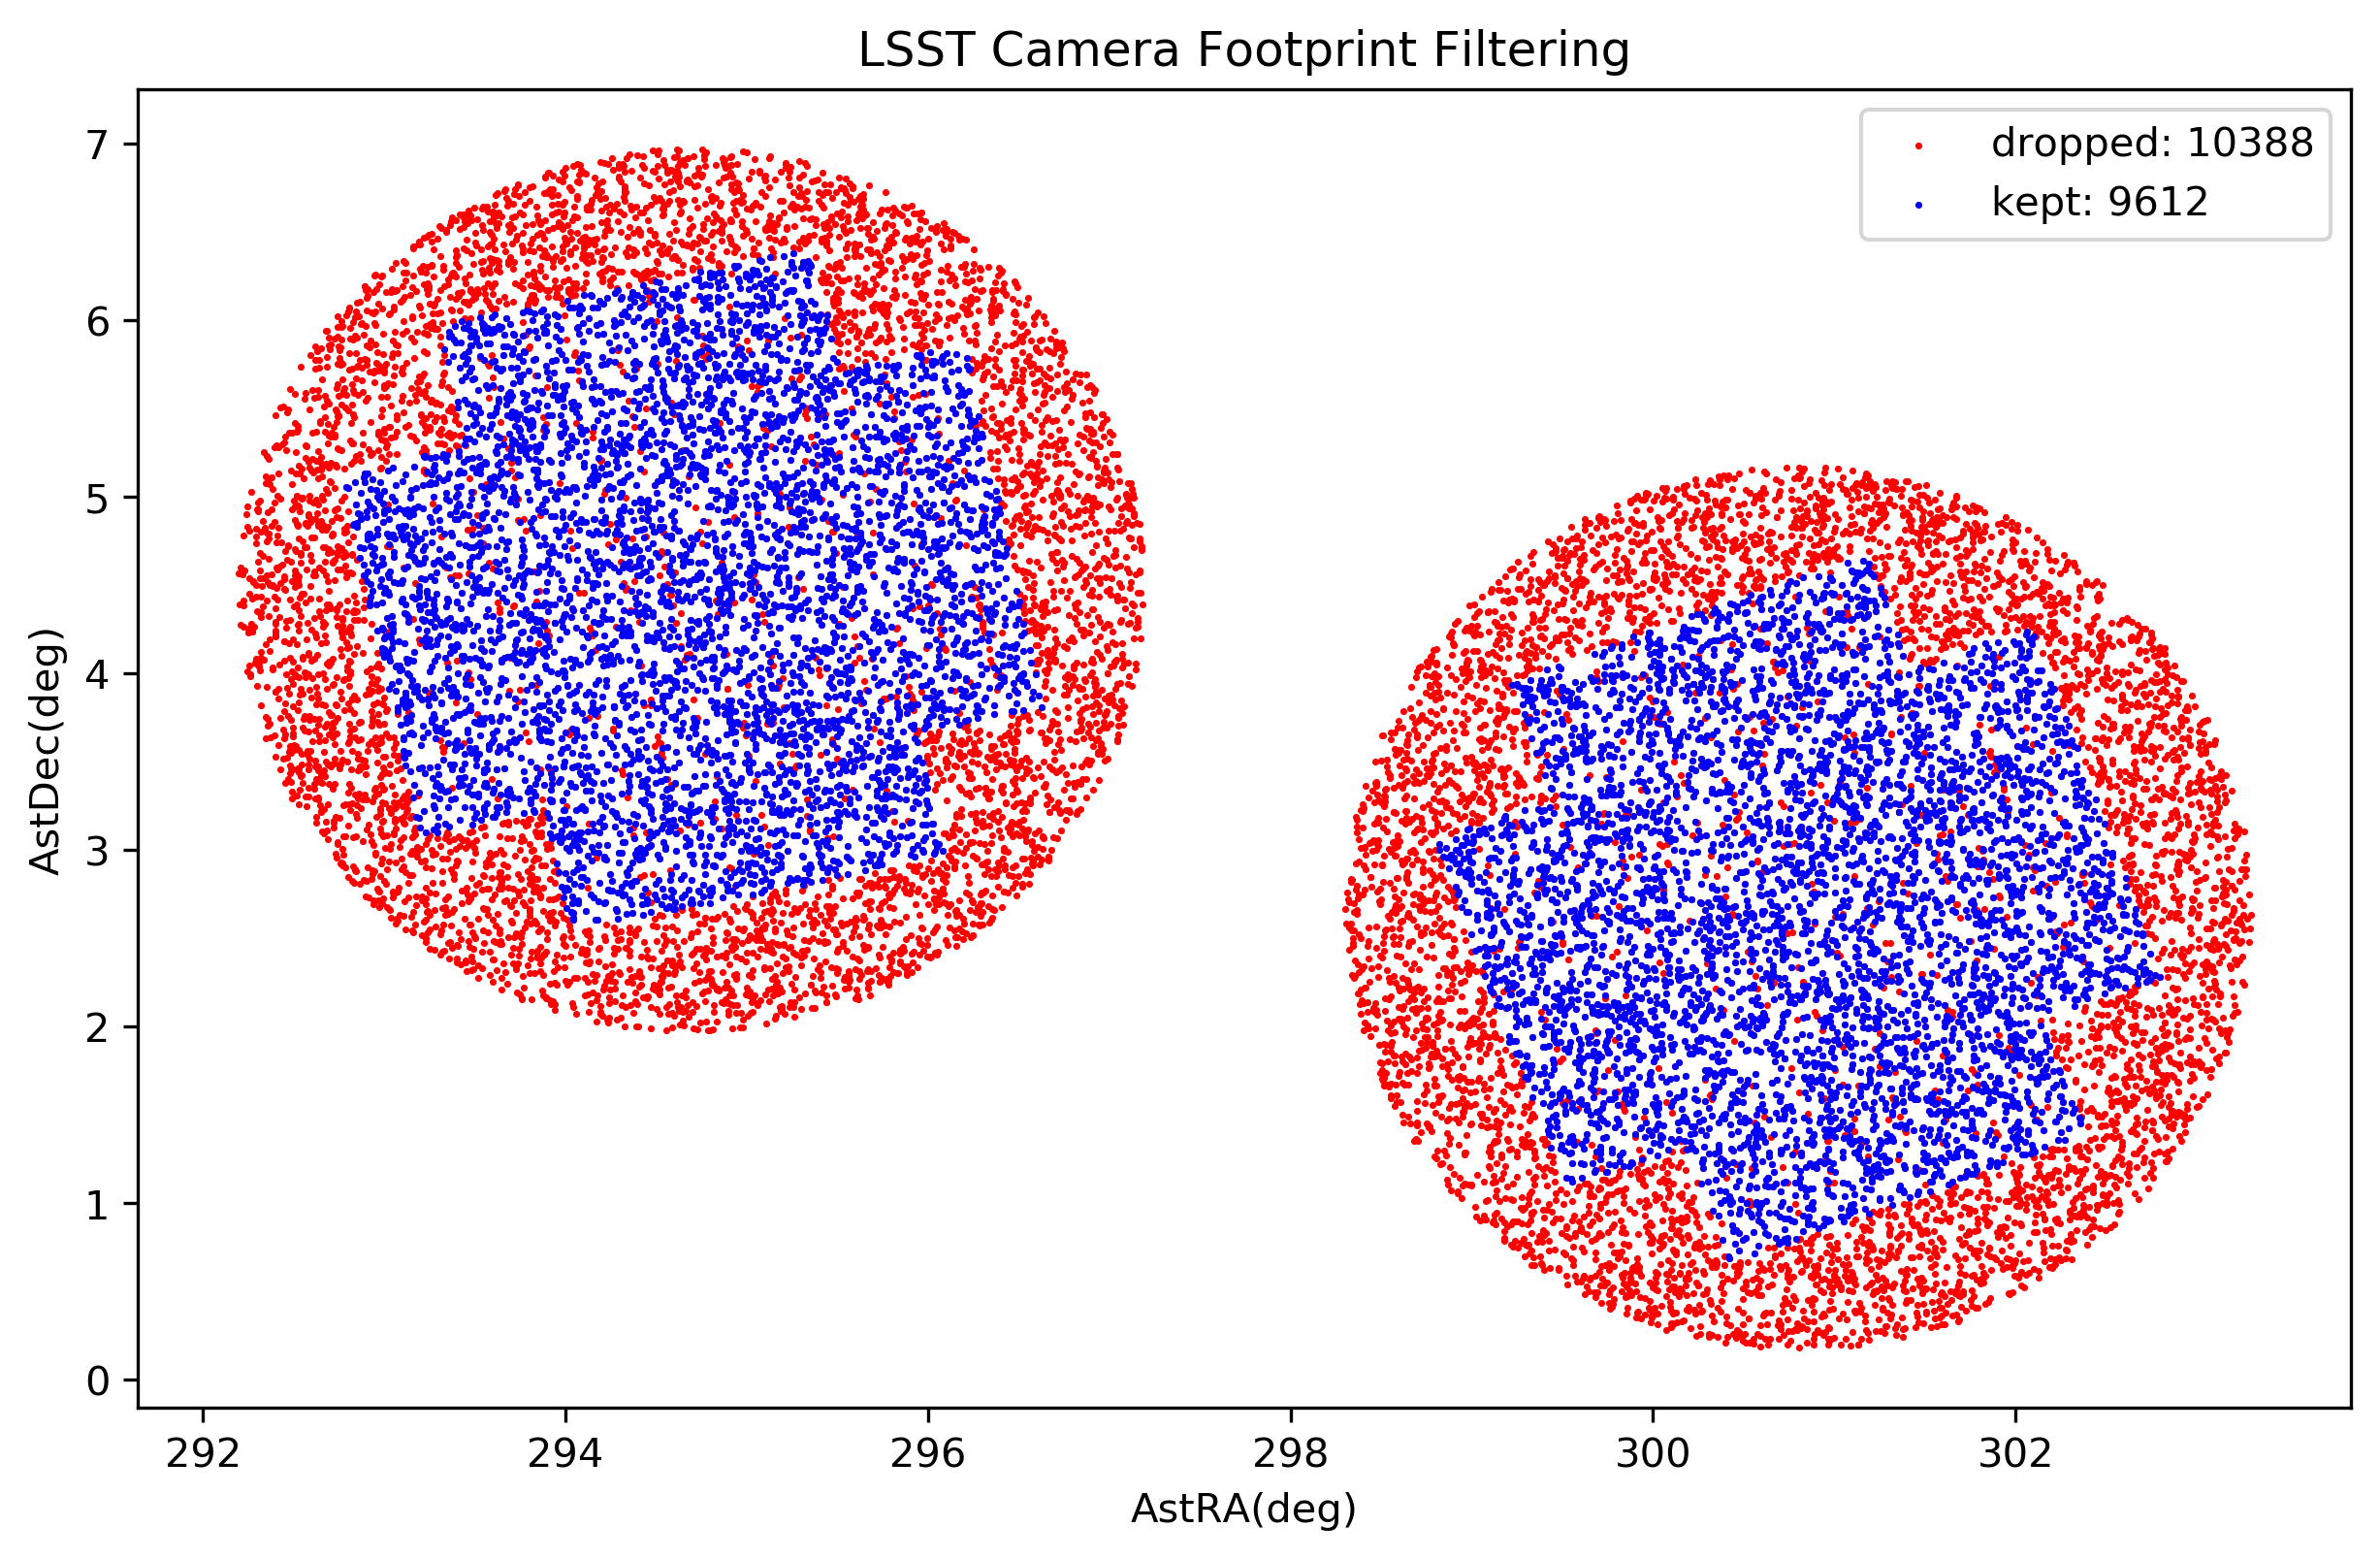

In [22]:
fp.plotFootprintFiltering(dfobs, df_new)

In [25]:
#df_new.to_csv('test_output_PPFootprintFilter.csv', index=False)

In [26]:
#dfobs.to_csv('test_input_PPFootprintFilter.csv', index=False)